In [1]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Labels

In [3]:
# Standardize the features (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
# Initialize the KNN classifier with k=5 (you can change k to any other value)
knn = KNeighborsClassifier(n_neighbors=5)

In [6]:
# Train the KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
# Make predictions on the testing set
y_pred = knn.predict(X_test)

In [8]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.44%


In [9]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

Classification Report:
              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       1.00      0.86      0.92        14
     class_2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



In [10]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]


In [11]:
# Optional: You can also explore the effect of different values of k on the model's accuracy
import matplotlib.pyplot as plt

In [12]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


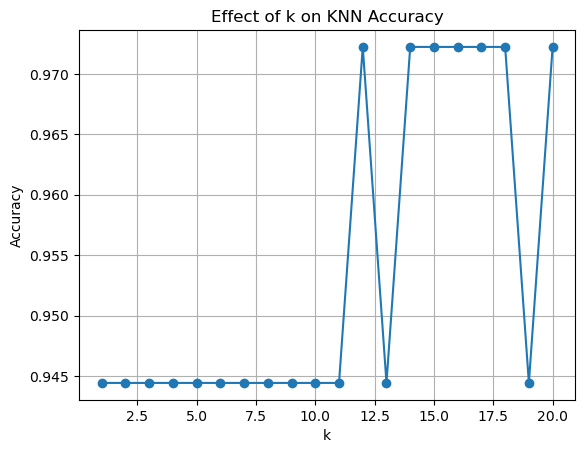

In [13]:
plt.plot(k_values, accuracies, marker='o')
plt.title('Effect of k on KNN Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()